## Exercise 4: The Barabasi-Albert-Model

In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import random

### Task 1: The Barabasi-Albert Model


####  a) Implementing Preferential Attachment
Write your own implementation of the Barabasi-Albert (BA) model, using the signature in the cell below. As an initial condition, start with a network with $m$ nodes and no edges.

In [2]:
def ba_graph(n,m):
    """
    :param n: number of nodes
    :param m: number of edges per incoming node
    :
    :return: networkx graph
    """
    G = nx.empty_graph(m)
    sample_list = list(range(m))
    
    for k in range(m,n):
        nodes = random.sample(sample_list,m)
        
        # note that this may yield multiedges
        G.add_edges_from(zip([k]*m,nodes))
        sample_list += (nodes + [k]*m)
    
    return G

#### b) Basic Statistics
Using your implementation, create a BA network with 1000 nodes, and number of edges per joining node (m) = 4. What is the average, minimum and maximum degree of the network? What is its diameter?

In [3]:
G = ba_graph(1000,4)

In [4]:
print(nx.info(G))
BA_degrees = dict(nx.degree(G)).values()
print(max(BA_degrees),min(BA_degrees))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 3937
Average degree:   7.8740
112 3


#### c) Local Clustering
For all integer values of $m$ between 5 and 30 create a Barabasi-Albert graph with 300 nodes and $m$ edges per incoming node. Further, for each value $m$, create an Erdos-Renyi graph with (roughly) the same average degree as the corresponding Barabasi-Albert graph.  Plot the average local clustering coefficient per network type against the average degree. What do you observe?

In [5]:
M_space = list(np.arange(5,30))
ba_graphs = dict([(m,ba_graph(300, m)) for m in M_space])
ba_dgs = [2*nx.number_of_edges(ba_graphs[m])/300 for m in M_space]
er_graphs = dict([(m,nx.erdos_renyi_graph(300, 2*nx.number_of_edges(ba_graphs[m])/300/299)) for m in M_space])
er_dgs = [2*nx.number_of_edges(er_graphs[m])/300 for m in M_space]

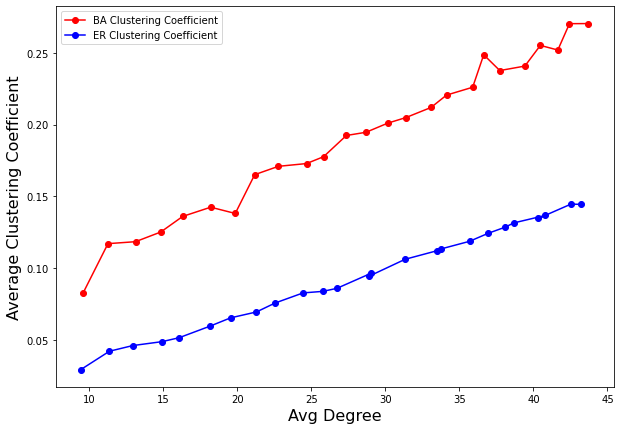

In [6]:
ba_accs = [nx.average_clustering(ba_graphs[m]) for m in M_space]
er_accs = [nx.average_clustering(er_graphs[m]) for m in M_space]

fig = plt.figure(figsize=(10,7))
plt.plot(ba_dgs, ba_accs, '-o',color='red',label='BA Clustering Coefficient')
plt.plot(er_dgs, er_accs, '-o',color='blue',label='ER Clustering Coefficient')
plt.xscale('linear')
plt.xlabel('Avg Degree', fontsize=16)
plt.ylabel('Average Clustering Coefficient', fontsize=16)
plt.legend()
plt.show()

__Answer__: We observe that BA graphs are always significantly more clustered than ER graphs of the same degrees.

#### d) Degree Distribution
Use your implementation to plot the degree distributions of a BA model with 1000 nodes and m=5. Create a _linear_ and a _log-log_ plot of the degree distribution, where y represents the share of nodes in the graph of a degree x. Make sure to bin the node frequencies via ```np.logspace``` to obtain less scattered plots. Do you observe a power-law degree distribution?

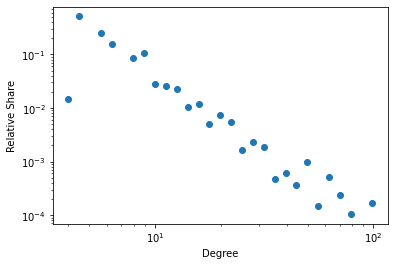

In [7]:
G = ba_graph(1000, 5)
degrees = list(dict(G.degree).values())

bin_edges = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), num=30)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig02 = plt.figure()
plt.loglog(bin_edges[:-1], density, marker='o', linestyle='none')

plt.xlabel("Degree")
plt.ylabel("Relative Share")
plt.show()

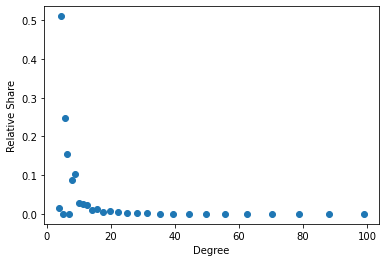

In [8]:
#hist = np.histogram(degrees, bins = len(set(degrees)))[0]
#d = np.unique(degrees)
#print(len(hist),len(d))

plt.scatter(bin_edges[:-1], density, marker='o')
#plt.scatter(d, hist, marker='o')

plt.xlabel("Degree")
plt.ylabel("Relative Share")
plt.show()

__Answer:__ The "linear" loglog curve along with the long-tailed linear plot clearly indicate a power-law degree distribution.

### Task 2: Comparing Robustness of Erdos-Renyi and Barabasi-Albert Models

In this task we conduct a robustness analysis on Erdos-Renyi and Barabasi-Albert Graphs

#### a) Random Attacks

Implement a function that performs a random attack of deleting $n$ nodes on a given graph. Use the signature in the cell below.

In [9]:
def random_attack(G,n):
    """
    :param G: networkx graph
    :param n: number of nodes to delete
    :
    :return: copy of G where nodes where deleted
    """
    nodes = [i for i in G.nodes()]
    x = random.sample(nodes,n)
    G.remove_nodes_from(x)
    return G


#### b) Targeted Attacks 

Implement a function that performs a targeted attack of deleting the $n$ highest-degree nodes on a given graph. Use the signature in the cell below.

In [10]:
def target_attack(G,n):
    """
    :param G: networkx graph
    :param n: number of nodes to delete
    :
    :return: copy of G where nodes where deleted
    """
    deg_seq = sorted([(n,d) for n,d in G.degree()],reverse = True, key = lambda x : x[1])
    seq = [n for n, d in deg_seq]
    G.remove_nodes_from(seq[:n])
    return G

#### c) Attacking Random Graphs

Create an Erdos-Renyi and a Barabasi-Albert Graph with 1000 nodes and average degree 2 (You may use the networkX built-ins now).

For both graphs and attack types, conduct 50 consecutive attacks of removing 10 nodes, and plot the number of removed nodes against the share of the biggest connected component in the graph. For each graph, include the curves of both attacks in the same plot. What do you observe?

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 999
Average degree:   1.9980


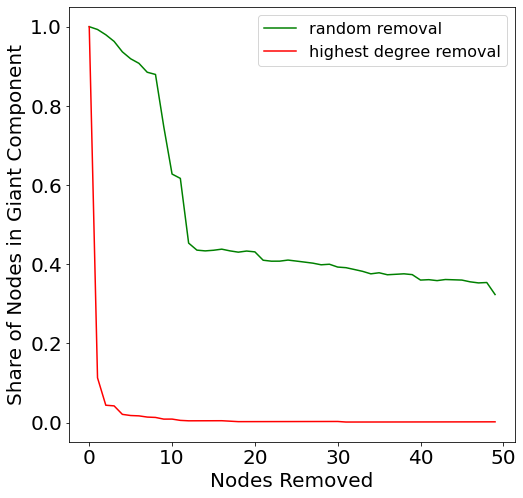

In [11]:
import random
from matplotlib import pyplot as plt

BA = nx.barabasi_albert_graph(1000,1)
print(nx.info(BA))
rep = 50 #num of iterations
share_rand = []
H = BA.copy()
N = H.number_of_nodes()
for i in range(rep):
    #For the computation of the giant component use undirected graph
    gc = max(len(c) for c in nx.connected_components(H))
    share_rand.append(gc/N)
    H = random_attack(H,10)
    N -= 10    
    
#Share of nodes in the giant component after removing highest degree nodes
share_t = []
D = BA.copy()
N = D.number_of_nodes()
for i in range(rep):
    #For the computation of the giant component use undirected graph
    gc = max(len(c) for c in nx.connected_components(D))
    share_t.append(gc/N)
    D = target_attack(D,10)
    N -= 10    
plt.figure(figsize=(8,8))
plt.plot([x for x in share_rand],label='random removal',color='green')
plt.plot([x for x in share_t],label='highest degree removal',color='red')
plt.ylabel('Share of Nodes in Giant Component',size=20)
plt.xlabel('Nodes Removed',size=20)
plt.legend(prop={'size': 16})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 984
Average degree:   1.9680


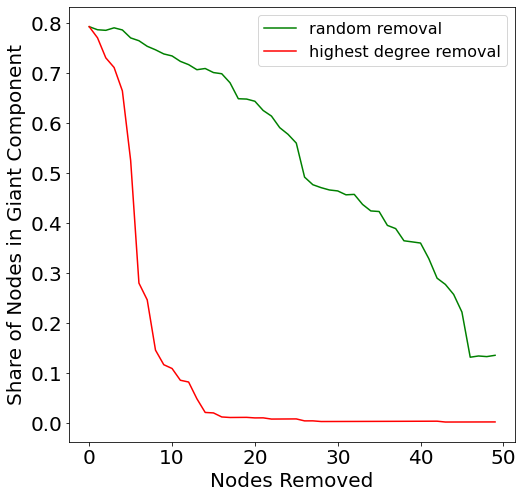

In [12]:
ER = nx.erdos_renyi_graph(1000, 2/999)

#ER = nx.erdos_renyi_graph(1858, 13.4919/1857)
print(nx.info(ER))
rep = 50 #num of iterations
share_rand = []
H = ER.copy()
N = H.number_of_nodes()
for i in range(rep):
    #For the computation of the giant component use undirected graph
    gc = max(len(c) for c in nx.connected_components(H))
    share_rand.append(gc/N)
    H = random_attack(H,10)
    N -= 10

    #Share of nodes in the giant component after removing highest degree nodes
share_t = []
D = ER.copy()
N = D.number_of_nodes()
for i in range(rep):
    #For the computation of the giant component use undirected graph
    gc = max(len(c) for c in nx.connected_components(D))
    share_t.append(gc/N)
    D = target_attack(D,10)
    N -= 10
plt.figure(figsize=(8,8))
plt.plot([x for x in share_rand],label='random removal',color='green')
plt.plot([x for x in share_t],label='highest degree removal',color='red')
plt.ylabel('Share of Nodes in Giant Component',size=20)
plt.xlabel('Nodes Removed',size=20)
plt.legend(prop={'size': 16})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

__Answer:__ The BA model is much more susceptible to targeted attacks than the ER model.